# GetRating: USGS, Latest 
     - Final (first draft)
     - July 1, 2024

## Other Resources:
- CWMS-python GitHub: https://github.com/HydrologicEngineeringCenter/cwms-python
- CWMS Ratings API:
    https://www.hec.usace.army.mil/confluence/display/CWMS/CWMS+Ratings
- CWMS Rating GitHub, Ryan Ripken resources link: https://github.com/USACE/cwms-data-api/issues/624


# CDA API end points: 
https://cwms-data-test.cwbi.us/cwms-data/swagger-ui.html

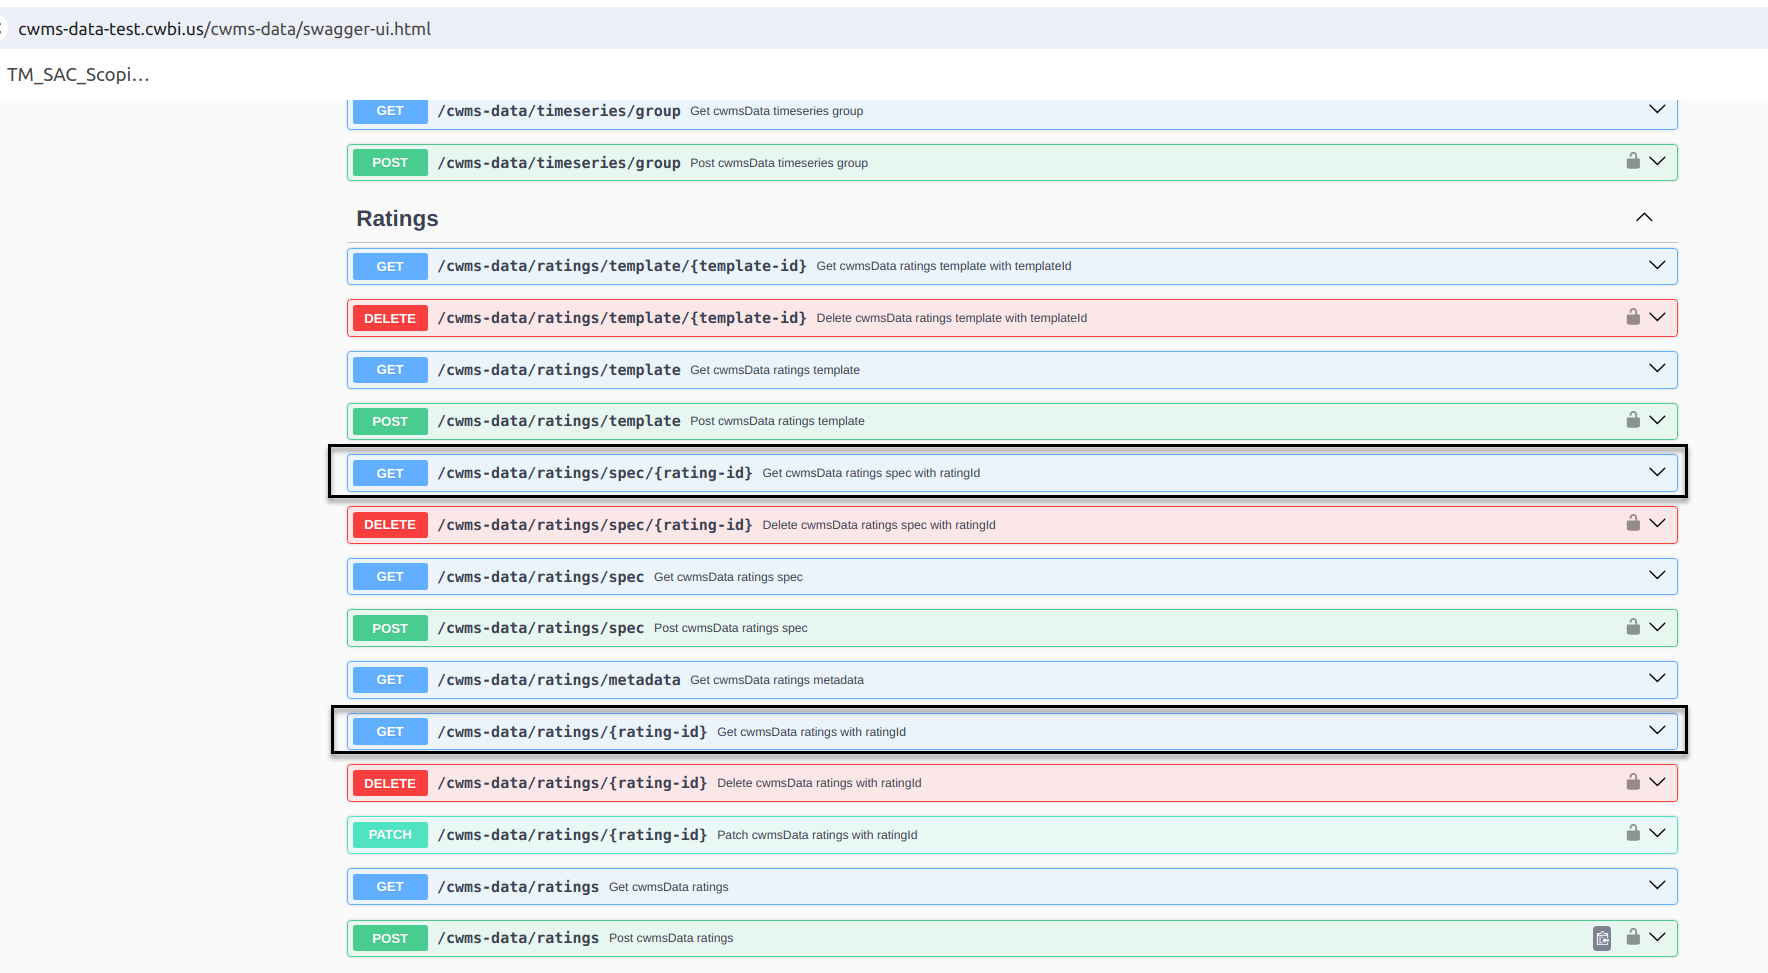


In [1]:
# Required Python modules and libraries 
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, datetime, timedelta, timezone 
import sys

# Json operation
import json
from pandas import json_normalize

# API communication
import requests

# USGS data retireval pacckages
import dataretrieval # some of the function needs all packages here 
from dataretrieval import nwis

# Eric's finction to call (old one so removed)
# from CWMS import CWMS 

## if we would like to transform XMl 
from xml.etree.ElementTree import Element, SubElement, tostring
from xml.dom import minidom
# from lxml import etree # it may not reuired
from ast import literal_eval

## added
import sys
sys.path.insert(0, "/home/krishna2023/Documents/repos/cwms-python/") # Path for the cwms-Python Package
import cwms


## Accesing to the Raing/Specs


In [2]:
# Inputs for the cwmspy and CDA information
apiRoot = "https://cwms-data-test.cwbi.us/cwms-data/" 
api = cwms.init_session(api_root = apiRoot)


In [3]:
# Calling cwmspy package to read the rating_specs API and pull the data
rating_specs = cwms.get_rating_specs(office_id ='LRL')  
print(type(rating_specs))

<class 'cwms.types.Data'>


In [4]:
# Get the data into a Pandas DF format
df_rating_spec = rating_specs.df
df_rating_spec

,office-id,rating-id,template-id,location-id,version,source-agency,in-range-method,out-range-low-method,out-range-high-method,active,auto-update,auto-activate,auto-migrate-extension,independent-rounding-specs,dependent-rounding-spec,description,effective-dates
0,LRL,03318800.Elev;Area.DemoAtMVN.Test,Elev;Area.DemoAtMVN,03318800,Test,USGS,LINEAR,ERROR,LINEAR,True,False,False,False,[{'value': '2222222222'}],2222233332,Test rating spec for Horse Branch.,NaN
1,LRL,Test.Elev;Area.DemoAtMVN.Production,Elev;Area.DemoAtMVN,Test,Production,USGS,LINEAR,ERROR,LINEAR,True,False,False,False,[{'value': '2222233332'}],2222233332,NaN,NaN
2,LRL,HorseBranch.Elev;Area.DemoAtMVN.Test,Elev;Area.DemoAtMVN,HorseBranch,Test,USGS,LINEAR,ERROR,LINEAR,True,False,False,False,[{'value': '2222222222'}],2222233332,Test rating spec for Horse Branch.,NaN
3,LRL,Dayton-MadRiver.Elev;Flow-Outflow.Standard.Pro...,Elev;Flow-Outflow.Standard,Dayton-MadRiver,Production,NaN,LINEAR,NULL,LINEAR,True,True,True,True,[{'value': '2222233332'}],2222233332,NaN,[2000-01-01T06:00:00Z]
4,LRL,03270500-MadRiver.Elev;Flow-Outflow.Standard.P...,Elev;Flow-Outflow.Standard,03270500-MadRiver,Production,NaN,LINEAR,NULL,LINEAR,True,True,True,True,[{'value': '2222233332'}],2222233332,NaN,[2000-01-01T06:00:00Z]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,LRL,Wooten.Stage;Stage-Shift.Logarithmic.USGS-NWIS,Stage;Stage-Shift.Logarithmic,Wooten,USGS-NWIS,NaN,LINEAR,LINEAR,NEAREST,True,True,True,False,[{'value': '2223456782'}],2223456782,USGS-style rating shifts,[2015-08-11T14:00:00Z]
1023,LRL,03280700.Stage;Stage-Shift.Logarithmic.USGS-NWIS,Stage;Stage-Shift.Logarithmic,03280700,USGS-NWIS,NaN,LINEAR,LINEAR,NEAREST,True,True,True,False,[{'value': '2223456782'}],2223456782,USGS-style rating shifts,[2015-08-11T14:00:00Z]
1024,LRL,Brookville.Stage;Stage.USGS-CORR.USGS-NWIS,Stage;Stage.USGS-CORR,Brookville,USGS-NWIS,NaN,LINEAR,NEAREST,NEAREST,True,True,True,True,[{'value': '4444444444'}],4444444444,"WHITEWATER RIVER AT BROOKVILLE, IN Stage Corre...",[2016-10-26T17:27:00Z]
1025,LRL,03276500.Stage;Stage.USGS-CORR.USGS-NWIS,Stage;Stage.USGS-CORR,03276500,USGS-NWIS,NaN,LINEAR,NEAREST,NEAREST,True,True,True,True,[{'value': '4444444444'}],4444444444,"WHITEWATER RIVER AT BROOKVILLE, IN Stage Corre...",[2016-10-26T17:27:00Z]


In [5]:
# Get a summary information of the DF 
df_rating_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   office-id                   1027 non-null   object
 1   rating-id                   1027 non-null   object
 2   template-id                 1027 non-null   object
 3   location-id                 1027 non-null   object
 4   version                     1027 non-null   object
 5   source-agency               252 non-null    object
 6   in-range-method             1027 non-null   object
 7   out-range-low-method        1027 non-null   object
 8   out-range-high-method       1027 non-null   object
 9   active                      1027 non-null   bool  
 10  auto-update                 1027 non-null   bool  
 11  auto-activate               1027 non-null   bool  
 12  auto-migrate-extension      1027 non-null   bool  
 13  independent-rounding-specs  1027 non-null   obje

In [6]:
# # print  column heading
# column_headings = df_rating_spec.columns
# print(column_headings)

### Aternative without using the cwmspy: not added here!

-- will be added latter if required

### Get the Location information using CWMSPy 


In [7]:
# pull the location data from the cwmspy package
Locdf = cwms.get_location_group(loc_group_id="USGS Station Number",category_id="Agency Aliases",office_id="CWMS").df.set_index('location-id')

# display the Dataframe 
Locdf 

,office-id,alias-id,attribute
location-id,,,
TULA,SWT,07164500,0.0
KEYS,SWT,07164200,0.0
HVYN8,MVP,05054500,0.0
MPLN8,MVP,05060000,0.0
Benson,MVP,05303500,0.0
...,...,...,...
DANA4,SWT,07260500,NaN
DAIM,SWT,08390500,NaN
BULL,SWT,07191315,NaN


In [8]:
# Grab all of the locations that have a USGS station number assigned to them
USGS_alias = Locdf[Locdf['alias-id'].notnull()]
# USGS_alias
# Rename the columns
USGS_alias = USGS_alias.rename(columns = {'alias-id': 'USGS_st_number','attribute':'Loc_attribute'})
USGS_alias

,office-id,USGS_st_number,Loc_attribute
location-id,,,
TULA,SWT,07164500,0.0
KEYS,SWT,07164200,0.0
HVYN8,MVP,05054500,0.0
MPLN8,MVP,05060000,0.0
Benson,MVP,05303500,0.0
...,...,...,...
DANA4,SWT,07260500,NaN
DAIM,SWT,08390500,NaN
BULL,SWT,07191315,NaN


### Pandas Operations: Inner join USGS and Location IDs DF

In [9]:
# Pandas Inner join operationg for the Location-ID and office-id
df_USGS = pd.merge(df_rating_spec, USGS_alias,  how ='inner', on = ['location-id','office-id'])
# pd.set_option('display.max_rows', None) # to siplay all the rows of a dataframe (a Global command)
df_USGS

,office-id,rating-id,template-id,location-id,version,source-agency,in-range-method,out-range-low-method,out-range-high-method,active,auto-update,auto-activate,auto-migrate-extension,independent-rounding-specs,dependent-rounding-spec,description,effective-dates,USGS_st_number,Loc_attribute
0,LRL,HorseBranch.Elev;Area.DemoAtMVN.Test,Elev;Area.DemoAtMVN,HorseBranch,Test,USGS,LINEAR,ERROR,LINEAR,True,False,False,False,[{'value': '2222222222'}],2222233332,Test rating spec for Horse Branch.,NaN,03318800,0.0
1,LRL,HorseBranch.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,HorseBranch,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,CANEY%20CREEK%20NEAR%20HORSE%20BRANCH%2C%20KY%...,"[2019-10-24T05:05:00Z, 2020-07-24T18:45:00Z, 2...",03318800,0.0
2,LRL,HorseBranch.Stage;Flow.Logarithmic.USGS-NWIS,Stage;Flow.Logarithmic,HorseBranch,USGS-NWIS,NaN,LINEAR,NEAREST,NEAREST,True,True,True,True,[{'value': '2223456782'}],2222233332,"CANEY CREEK NEAR HORSE BRANCH, KY USGS-NWIS St...",[2013-10-01T05:00:00Z],03318800,0.0
3,LRL,HorseBranch.Stage;Stage-Offset.Logarithmic.USG...,Stage;Stage-Offset.Logarithmic,HorseBranch,USGS-NWIS,NaN,PREVIOUS,NEAREST,NEAREST,True,True,True,False,[{'value': '2223456782'}],2223456782,USGS-style logarithmic interpolation offsets,[2013-10-01T05:00:00Z],03318800,0.0
4,LRL,HorseBranch.Stage;Stage-Shift.Logarithmic.USGS...,Stage;Stage-Shift.Logarithmic,HorseBranch,USGS-NWIS,NaN,LINEAR,LINEAR,NEAREST,True,True,True,False,[{'value': '2223456782'}],2223456782,USGS-style rating shifts,[2015-10-06T21:15:00Z],03318800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,LRL,Lafayette.Stage;Stage-Offset.Logarithmic.USGS-...,Stage;Stage-Offset.Logarithmic,Lafayette,USGS-NWIS,NaN,PREVIOUS,NEAREST,NEAREST,True,True,True,False,[{'value': '2223456782'}],2223456782,USGS-style logarithmic interpolation offsets,[2011-10-17T04:00:00Z],03335500,0.0
334,LRL,Lafayette.Stage;Stage-Shift.Logarithmic.USGS-NWIS,Stage;Stage-Shift.Logarithmic,Lafayette,USGS-NWIS,NaN,LINEAR,LINEAR,NEAREST,True,True,True,False,[{'value': '2223456782'}],2223456782,USGS-style rating shifts,[2015-10-28T15:09:00Z],03335500,0.0
335,LRL,Montezuma.Stage;Flow.Logarithmic.USGS-NWIS,Stage;Flow.Logarithmic,Montezuma,USGS-NWIS,NaN,LINEAR,NEAREST,NEAREST,True,True,True,True,[{'value': '2223456782'}],2222233332,"WABASH RIVER AT MONTEZUMA, IN USGS-NWIS Stream...",[2012-07-12T04:00:00Z],03340500,0.0
336,LRL,Montezuma.Stage;Stage-Offset.Logarithmic.USGS-...,Stage;Stage-Offset.Logarithmic,Montezuma,USGS-NWIS,NaN,PREVIOUS,NEAREST,NEAREST,True,True,True,False,[{'value': '2223456782'}],2223456782,USGS-style logarithmic interpolation offsets,[2012-07-12T04:00:00Z],03340500,0.0


In [10]:
# Filter the data for "source-agency as USGS"
df_USGS_information = df_USGS[df_USGS["source-agency"] == "USGS"]
df_USGS_information

,office-id,rating-id,template-id,location-id,version,source-agency,in-range-method,out-range-low-method,out-range-high-method,active,auto-update,auto-activate,auto-migrate-extension,independent-rounding-specs,dependent-rounding-spec,description,effective-dates,USGS_st_number,Loc_attribute
0,LRL,HorseBranch.Elev;Area.DemoAtMVN.Test,Elev;Area.DemoAtMVN,HorseBranch,Test,USGS,LINEAR,ERROR,LINEAR,True,False,False,False,[{'value': '2222222222'}],2222233332,Test rating spec for Horse Branch.,NaN,03318800,0.0
1,LRL,HorseBranch.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,HorseBranch,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,CANEY%20CREEK%20NEAR%20HORSE%20BRANCH%2C%20KY%...,"[2019-10-24T05:05:00Z, 2020-07-24T18:45:00Z, 2...",03318800,0.0
10,LRL,Brookville.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,Brookville,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,WHITEWATER%20RIVER%20AT%20BROOKVILLE%2C%20IN%2...,"[2019-10-29T01:55:00Z, 2020-08-05T19:55:00Z, 2...",03276500,0.0
22,LRL,Taylorsville.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,Taylorsville,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,BRASHEARS%20CREEK%20AT%20TAYLORSVILLE%2C%20KY%...,"[2019-08-15T23:20:00Z, 2020-06-03T22:40:00Z, 2...",03295890,0.0
28,LRL,Adamsboro.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,Adamsboro,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,EEL%20RIVER%20NEAR%20LOGANSPORT%2C%20IN%20Expa...,"[2019-09-13T21:30:00Z, 2020-07-10T21:15:00Z, 2...",03328500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,LRL,Wilberforce.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,Wilberforce,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,Massies%20Creek%20at%20Wilberforce%20OH%20Expa...,"[2019-10-16T21:10:00Z, 2021-05-13T02:11:00Z, 2...",03241500,0.0
325,LRL,Willow.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,Willow,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,KENTUCKY%20RIVER%20AT%20LOCK%2013%20NEAR%20WIL...,"[2021-02-09T21:25:00Z, 2021-05-13T02:14:00Z, 2...",03282060,0.0
326,LRL,Winslow.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,Winslow,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,PATOKA%20RIVER%20AT%20WINSLOW%2C%20IN%20Expand...,"[2021-02-05T22:15:00Z, 2021-04-14T03:05:00Z, 2...",03376300,0.0
327,LRL,Wooten.Stage;Flow.EXSA.USGS-NWIS,Stage;Flow.EXSA,Wooten,USGS-NWIS,USGS,LINEAR,NEAREST,NEAREST,True,True,False,False,[{'value': '4444444444'}],4444444444,CUTSHIN%20CREEK%20AT%20WOOTON%2C%20KY%20Expand...,"[2019-10-04T18:50:00Z, 2021-05-13T02:14:00Z, 2...",03280700,0.0


In [11]:
df_USGS_information.info() # check ddata information  

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 331
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office-id                   117 non-null    object 
 1   rating-id                   117 non-null    object 
 2   template-id                 117 non-null    object 
 3   location-id                 117 non-null    object 
 4   version                     117 non-null    object 
 5   source-agency               117 non-null    object 
 6   in-range-method             117 non-null    object 
 7   out-range-low-method        117 non-null    object 
 8   out-range-high-method       117 non-null    object 
 9   active                      117 non-null    bool   
 10  auto-update                 117 non-null    bool   
 11  auto-activate               117 non-null    bool   
 12  auto-migrate-extension      117 non-null    bool   
 13  independent-rounding-specs  117 non-null

### Function to filter the USGS data sources and edit description 

In [12]:
## USGS database also contains other irrelevant information, such as a "Test" under the column "version.
# Clear off all the irrelevant information created by the local agency and also make the description readable

# ***********************************************************************
import pandas as pd

def filtered_USGS_information(df):
    
    """
    Filter rows where 'rating-id' contains 'USGS' and clean the 'description' column by replacing
    '%20' with space and '%2C' with comma.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with USGS information.
    
    Returns:
    pd.DataFrame: A new DataFrame with filtered and cleaned USGS information.
    """
    
    filtered_data = []

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Check if 'USGS' is in the 'rating-id'
        if 'USGS' in row['rating-id']:
            # Append the required columns to the filtered_data list
            filtered_data.append({
                'office-id': row['office-id'],
                'rating-id': row['rating-id'],
                'version': row['version'],
                'USGS_st_number': row['USGS_st_number'],
                'description': row['description']
            })

    # Convert the filtered data to a new DataFrame
    df_filtered_USGS_information = pd.DataFrame(filtered_data)

    # Replace '%20' with space and '%2C' with comma in the description column using .loc
    df_filtered_USGS_information.loc[:, 'description'] = df_filtered_USGS_information['description'].str.replace('%20', ' ')
    df_filtered_USGS_information.loc[:, 'description'] = df_filtered_USGS_information['description'].str.replace('%2C', ',')

    # Set display option to show the full width of the description column
    pd.set_option('display.max_colwidth', None)

    return df_filtered_USGS_information


In [13]:
# call the function: df_filtered_USGS_information
df = df_USGS_information
df_filtered_USGS_information = filtered_USGS_information(df) # This Df will be used for extracting the UGSS data and data from CDA
df_filtered_USGS_information

,office-id,rating-id,version,USGS_st_number,description
0,LRL,HorseBranch.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03318800,"CANEY CREEK NEAR HORSE BRANCH, KY Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
1,LRL,Brookville.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03276500,"WHITEWATER RIVER AT BROOKVILLE, IN Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
2,LRL,Taylorsville.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03295890,"BRASHEARS CREEK AT TAYLORSVILLE, KY Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
3,LRL,Adamsboro.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03328500,"EEL RIVER NEAR LOGANSPORT, IN Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
4,LRL,Alpine.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03275000,"WHITEWATER RIVER NEAR ALPINE, IN Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
...,...,...,...,...,...
111,LRL,Wilberforce.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03241500,"Massies Creek at Wilberforce OH Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
112,LRL,Willow.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03282060,"KENTUCKY RIVER AT LOCK 13 NEAR WILLOW SHOALS, KY Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
113,LRL,Winslow.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03376300,"PATOKA RIVER AT WINSLOW, IN Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
114,LRL,Wooten.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03280700,"CUTSHIN CREEK AT WOOTON, KY Expanded, Shift-Adjusted USGS-NWIS Stream Rating"


In [14]:
# consider a few of the USGS stations to test further 
df_test = df_filtered_USGS_information.head(n=5) 
df_test

,office-id,rating-id,version,USGS_st_number,description
0,LRL,HorseBranch.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03318800,"CANEY CREEK NEAR HORSE BRANCH, KY Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
1,LRL,Brookville.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03276500,"WHITEWATER RIVER AT BROOKVILLE, IN Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
2,LRL,Taylorsville.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03295890,"BRASHEARS CREEK AT TAYLORSVILLE, KY Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
3,LRL,Adamsboro.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03328500,"EEL RIVER NEAR LOGANSPORT, IN Expanded, Shift-Adjusted USGS-NWIS Stream Rating"
4,LRL,Alpine.Stage;Flow.EXSA.USGS-NWIS,USGS-NWIS,03275000,"WHITEWATER RIVER NEAR ALPINE, IN Expanded, Shift-Adjusted USGS-NWIS Stream Rating"


## Three functions to pull three ratings data and metadata from the USGS sources

### Function to pull the USGA BASE RATING data based on the CAD information

In [15]:
## USGS Base Rating
# *********************
import pandas as pd
import requests
from datetime import datetime

def process_usgs_base_ratings(df):
    """
    Process USGS BASE ratings based on the provided df.
    
    df (DataFrame): DataFrame containing office IDs, rating IDs, and USGS site numbers.
        
    Returns:
        base_dfs (dict): Dictionary mapping rating IDs to their respective formatted DataFrames.

    """
    
    base_dfs = {}

    for index, row in df.iterrows():
        office_name = row['office-id']
        rating_id = row['rating-id']
        site_id = row['USGS_st_number']
        
        print(f"{office_name} Office USGS, Base Rating")
        print(f"USGS Station Id: {site_id}")
        print(f"Rating ID: {rating_id}")
        
        # Get rating data -check usgs data retrieval package
        ratingData = nwis.get_ratings(site=site_id, file_type="base")
        df_base = ratingData[0]
        
        # Check if df_exsa is None or empty
        if df_base is None or df_base.empty:
            print(f"Station {site_id} does not have rating values.")
            continue
        
        url = ratingData[1].url
        response = requests.get(url)
        
        usgs_rating_web_base = response.text.split('\n')
        
               
        station_name = ''
        rating_offset = ''
        rating_start_date = ''

       
        for line in usgs_rating_web_base:
            if line.startswith("# //STATION NAME"):
                station_name = line[19:-1].strip()
            if line.startswith("# //RATING OFFSET1"):
                rating_offset = line[19:].strip()
            if line.startswith("# //RATING_INDEP ROUNDING="):
                ind_parameter = line[44:-1].strip()
            if line.startswith("# //RATING_DEP ROUNDING="):
                dep_parameter = line[42:-1].strip()
            if line.startswith("# //RATING EXPANSION="):
                rating_expansion = line[22:-1].strip()
            if line.startswith("# //RATING_DATETIME BEGIN"):
                rating_start_date = line[26:54].strip()
                
                 
        print(f"station_name = {station_name}") 
        print(f"rating_offset = {rating_offset}") 
        print(f"rating_start_date = {rating_start_date}") 
        print(f"ind_parameter = {ind_parameter}")
        print(f"dep_parameter = {dep_parameter}")
        print(f"rating_expansion = {rating_expansion}")

        
               
        print("USGS link =", url)
        print("*****************************")
        # print(df_base)  # Displaying the DataFrame obtained from the USGS
        print("*****************************")
        
                
        # Rename columns
        df_base = df_base.rename(columns={"INDEP": "ind", "DEP": "dep"})
        
        # Drop the 'STOR' column if it exists
        if 'STOR' in df_base.columns:
            df_base = df_base.drop(columns=['STOR'])


        # Plot the figure - if we want to 
        df_base.plot(x='dep', y='ind', figsize=(6, 4))
        plt.title(f"Rating for USGS Station Id: {site_id}")
        plt.xlabel("DEP: Streamflow in cfs")
        plt.ylabel("INDEP: Gage Height in feet")
        plt.grid(True)
        plt.show()

               
        # Create the resulting dataframe with only 'ind' and 'dep'
        base_df = df_base[['ind', 'dep']].copy()            
        base_dfs[rating_id] = base_df  # Store format_df for the current rating ID
        
        print(base_df)
        print("*****************************")
    
    return base_dfs       



LRL Office USGS, Base Rating
USGS Station Id: 03318800
Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS
station_name = ANEY CREEK NEAR HORSE BRANCH, KY
rating_offset = 2.000000E+00
rating_start_date = 20230103093000 BZONE=-06:00
ind_parameter = Gage height (ft)
dep_parameter = Discharge (ft^3/s)
rating_expansion = logarithmic
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03318800&file_type=base
*****************************
*****************************


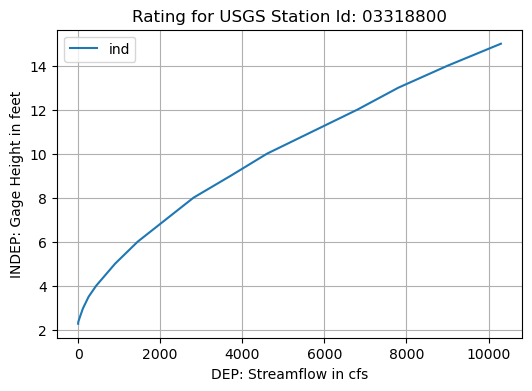

      ind           dep
0    2.27      0.000010
1    2.28      0.050000
2    2.29      0.500000
3    2.30      0.750000
4    2.31      1.100000
5    2.32      1.400000
6    2.33      1.800000
7    2.34      2.300000
8    2.35      3.400000
9    2.36      4.700000
10   2.38      8.200001
11   2.40     11.700000
12   2.45     19.500000
13   2.50     29.500000
14   2.60     47.000000
15   2.70     66.000000
16   2.80     85.000000
17   2.90    103.000000
18   3.00    125.000000
19   3.50    255.000000
20   4.00    440.000000
21   5.00    900.000000
22   6.00   1450.000000
23   8.00   2810.000000
24   9.00   3720.000000
25  10.00   4600.000000
26  11.00   5700.000000
27  12.00   6800.000000
28  13.00   7800.000000
29  14.00   9000.000000
30  15.00  10300.000000
*****************************
LRL Office USGS, Base Rating
USGS Station Id: 03276500
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS
station_name = HITEWATER RIVER AT BROOKVILLE, IN
rating_offset = 6.000000E-01
rating_start_date = 2

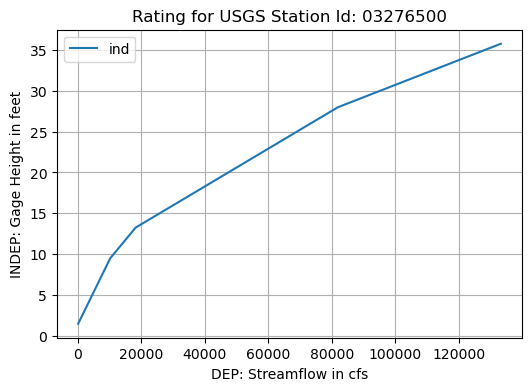

     ind        dep
0   1.45      74.46
1   9.48   10179.56
2  13.24   18184.17
3  28.00   81900.00
4  35.79  133249.35
*****************************
LRL Office USGS, Base Rating
USGS Station Id: 03295890
Rating ID: Taylorsville.Stage;Flow.EXSA.USGS-NWIS
station_name = RASHEARS CREEK AT TAYLORSVILLE, KY
rating_offset = 5.000000E+00
rating_start_date = 20231008070000 BZONE=-05:00
ind_parameter = Gage height (ft)
dep_parameter = Discharge (ft^3/s)
rating_expansion = logarithmic
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03295890&file_type=base
*****************************
*****************************


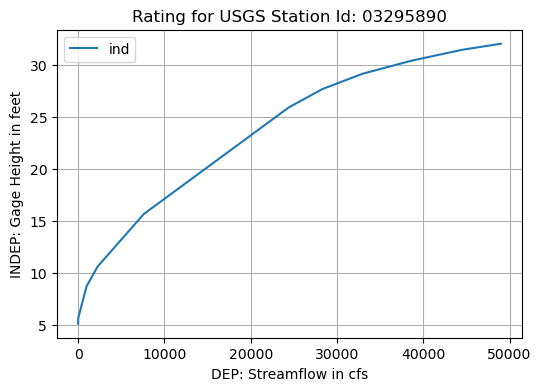

       ind        dep
0    5.101      0.000
1    5.138      0.007
2    5.260      0.310
3    5.380      1.920
4    5.550      7.520
5    5.660     13.290
6    8.650    957.590
7    8.810   1050.340
8   10.620   2279.050
9   15.650   7624.120
10  25.900  24444.080
11  27.640  28304.950
12  29.110  32941.320
13  30.360  38593.620
14  31.410  44461.250
15  32.000  49000.000
*****************************
LRL Office USGS, Base Rating
USGS Station Id: 03328500
Rating ID: Adamsboro.Stage;Flow.EXSA.USGS-NWIS
station_name = EL RIVER NEAR LOGANSPORT, IN
rating_offset = 1.800000E+00
rating_start_date = 20151117000000 BZONE=-05:00
ind_parameter = Gage height (ft)
dep_parameter = Discharge (ft^3/s)
rating_expansion = logarithmic
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03328500&file_type=base
*****************************
*****************************


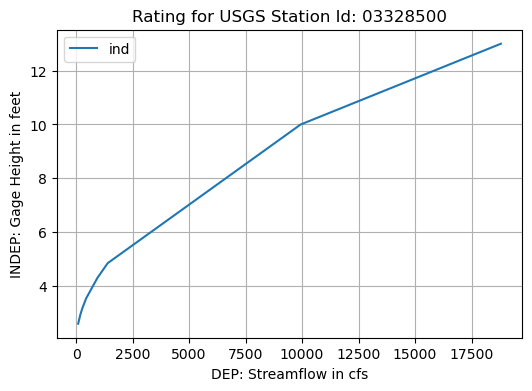

     ind      dep
0   2.60     85.0
1   2.94    182.4
2   3.18    272.3
3   3.54    437.5
4   4.30    935.7
5   4.85   1393.0
6  10.00   9935.0
7  13.00  18800.0
*****************************
LRL Office USGS, Base Rating
USGS Station Id: 03275000
Rating ID: Alpine.Stage;Flow.EXSA.USGS-NWIS
station_name = HITEWATER RIVER NEAR ALPINE, IN
rating_offset = 2.700000E+00
rating_start_date = 20221116111200 BZONE=-05:00
ind_parameter = Gage height (ft)
dep_parameter = Discharge (ft^3/s)
rating_expansion = logarithmic
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03275000&file_type=base
*****************************
*****************************


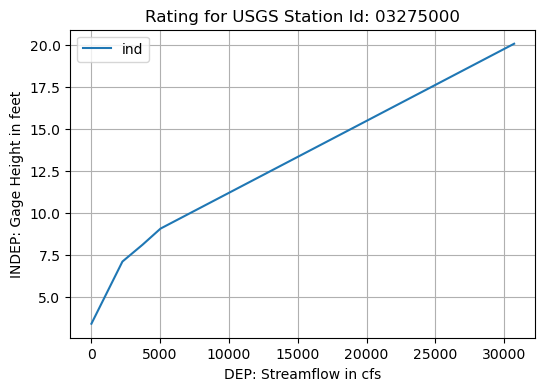

     ind       dep
0   3.40      2.38
1   7.10   2258.00
2   8.10   3718.00
3   9.06   5026.00
4  20.06  30730.00
*****************************


In [16]:
# Test the process_usgs_base_ratings function
df = df_filtered_USGS_information.head(n = 5)
base_dfs = process_usgs_base_ratings(df)

In [17]:
# Read the stored database from this function
base_dfs

{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS':       ind           dep
 0    2.27      0.000010
 1    2.28      0.050000
 2    2.29      0.500000
 3    2.30      0.750000
 4    2.31      1.100000
 5    2.32      1.400000
 6    2.33      1.800000
 7    2.34      2.300000
 8    2.35      3.400000
 9    2.36      4.700000
 10   2.38      8.200001
 11   2.40     11.700000
 12   2.45     19.500000
 13   2.50     29.500000
 14   2.60     47.000000
 15   2.70     66.000000
 16   2.80     85.000000
 17   2.90    103.000000
 18   3.00    125.000000
 19   3.50    255.000000
 20   4.00    440.000000
 21   5.00    900.000000
 22   6.00   1450.000000
 23   8.00   2810.000000
 24   9.00   3720.000000
 25  10.00   4600.000000
 26  11.00   5700.000000
 27  12.00   6800.000000
 28  13.00   7800.000000
 29  14.00   9000.000000
 30  15.00  10300.000000,
 'Brookville.Stage;Flow.EXSA.USGS-NWIS':      ind        dep
 0   1.45      74.46
 1   9.48   10179.56
 2  13.24   18184.17
 3  28.00   81900.00
 4  35.79  13

### Function to pull the USGS EXSA RATING daat based on the CAD information 

In [18]:
# USGS Exsa rating
# *********************
import pandas as pd
import requests
from datetime import datetime

def process_usgs_exsa_ratings(df):
    """
    Process USGS EXSA ratings based on the provided df.
    
    Parameters:
        df (DataFrame): DataFrame containing office IDs, rating IDs, and USGS site numbers.
        
    Returns:
        shift_dates (dict): Dictionary mapping rating IDs to shifted dates.
       exsa_dfs (dict): Dictionary mapping rating IDs to their calculated dep and ind paramaters.
    """
    
    shift_dates = {}
    exsa_dfs = {}

    for index, row in df.iterrows():
        office_name = row['office-id']
        rating_id = row['rating-id']
        site_id = row['USGS_st_number']
        
        print(f"{office_name} Office USGS, Exas Rating")
        print(f"USGS Station Id: {site_id}")
        print(f"Rating ID: {rating_id}")
        
        # Fetch rating data -check usgs data retrieval package
        ratingData = nwis.get_ratings(site=site_id, file_type="exsa")
        df_exsa = ratingData[0]
        
        # Check if df_exsa is None or empty
        if df_exsa is None or df_exsa.empty:
            print(f"Station {site_id} does not have rating values.")
            continue
        
        url = ratingData[1].url
        response = requests.get(url)
        
        usgs_rating_web_exsa = response.text.split('\n')
        
        station_name = ''
        rating_offset = ''
        rating_shifted_date = ''
        ind_parameter = ''
        rating_expansion = ''
        dep_parameter = ''

        for line in usgs_rating_web_exsa:
            if line.startswith("# //STATION NAME"):
                station_name = line[19:-1].strip()
            if line.startswith("# //RATING OFFSET1"):
                rating_offset = line[19:].strip()
            if line.startswith("# //RATING_INDEP ROUNDING="):
                ind_parameter = line[44:-1].strip()
            if line.startswith("# //RATING_DEP ROUNDING="):
                dep_parameter = line[42:-1].strip()
            if line.startswith("# //RATING EXPANSION="):
                rating_expansion = line[22:-1].strip()
            if line.startswith("# //RATING SHIFTED="):
                rating_shifted_date = line[20:38].strip()
                date_string = rating_shifted_date[:-4]
                dt = datetime.strptime(date_string, '%Y%m%d%H%M%S')
                rating_shifted_date = dt.strftime('%Y-%m-%d %H:%M:%S') + " EST"
                
        # Store rating shifted date in shift_dates dictionary
        shift_dates[rating_id] = rating_shifted_date
        
        print(f"station_name = {station_name}") 
        print(f"rating_offset = {rating_offset}") 
        print(f"rating_shifted_date = {rating_shifted_date}") 
        print(f"ind_parameter = {ind_parameter}")
        print(f"dep_parameter = {dep_parameter}")
        print(f"rating_expansion = {rating_expansion}")
        
        print("USGS link =", url)
        print("*****************************")
        
        # Calculate ind as INDEP + SHIFT
        df_exsa['ind'] = df_exsa['INDEP'] + df_exsa['SHIFT']
        
        # Rename columns
        df_exsa = df_exsa.rename(columns={"DEP": "dep"})
        
        # Create the resulting dataframe with only 'ind' and 'dep'
        exsa_df = df_exsa[['ind', 'dep']].copy()
        
        # Drop the 'STOR' column if it exists
        if 'STOR' in exsa_df.columns:
            exsa_df.drop(columns=['STOR'], inplace=True)
        
        exsa_dfs[rating_id] = exsa_df  # Store format_df for the current rating ID
        
        print(exsa_df)
        print("*****************************")
    
    return shift_dates, exsa_dfs


In [19]:
df = df_filtered_USGS_information.head(n = 5)
shift_dates, exsa_dfs = process_usgs_exsa_ratings(df)

LRL Office USGS, Exas Rating
USGS Station Id: 03318800
Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS
station_name = ANEY CREEK NEAR HORSE BRANCH, KY
rating_offset = 2.000000E+00
rating_shifted_date = 2024-06-18 19:00:02 EST
ind_parameter = Gage height (ft)
dep_parameter = Discharge (ft^3/s)
rating_expansion = logarithmic
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03318800&file_type=exsa
*****************************
        ind       dep
0      2.27      0.00
1      2.28      0.05
2      2.29      0.50
3      2.30      0.75
4      2.31      1.10
...     ...       ...
1259  14.96  10246.64
1260  14.97  10259.97
1261  14.98  10273.30
1262  14.99  10286.65
1263  15.00  10300.00

[1264 rows x 2 columns]
*****************************
LRL Office USGS, Exas Rating
USGS Station Id: 03276500
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS
station_name = HITEWATER RIVER AT BROOKVILLE, IN
rating_offset = 6.000000E-01
rating_shifted_date = 2024-04-25 18:20:02 EST
i

In [20]:
shift_dates

{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS': '2024-06-18 19:00:02 EST',
 'Brookville.Stage;Flow.EXSA.USGS-NWIS': '2024-04-25 18:20:02 EST',
 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS': '2024-05-28 18:45:01 EST',
 'Adamsboro.Stage;Flow.EXSA.USGS-NWIS': '2024-05-17 20:50:01 EST',
 'Alpine.Stage;Flow.EXSA.USGS-NWIS': '2024-05-31 14:25:02 EST'}

In [21]:
exsa_dfs

{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS':         ind       dep
 0      2.27      0.00
 1      2.28      0.05
 2      2.29      0.50
 3      2.30      0.75
 4      2.31      1.10
 ...     ...       ...
 1259  14.96  10246.64
 1260  14.97  10259.97
 1261  14.98  10273.30
 1262  14.99  10286.65
 1263  15.00  10300.00
 
 [1264 rows x 2 columns],
 'Brookville.Stage;Flow.EXSA.USGS-NWIS':         ind        dep
 0      1.45      74.46
 1      1.46      76.31
 2      1.47      78.18
 3      1.48      80.07
 4      1.49      81.99
 ...     ...        ...
 3430  35.75  132954.88
 3431  35.76  133028.47
 3432  35.77  133102.08
 3433  35.78  133175.70
 3434  35.79  133249.35
 
 [3435 rows x 2 columns],
 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS':         ind       dep
 0      5.11      0.00
 1      5.11      0.00
 2      5.13      0.01
 3      5.13      0.01
 4      5.13      0.01
 ...     ...       ...
 2685  31.96  48681.44
 2686  31.97  48760.93
 2687  31.98  48840.52
 2688  31.99  48920.21
 268

In [22]:
## Optional operations
# Accessing shift_dates for further analysis
for rating_id, shifted_date in shift_dates.items():
        print(f"Rating ID: {rating_id}, Shifted Date: {shifted_date}")

    # Accessing exsa_dfs for further analysis
for rating_id, exsa_df in exsa_dfs.items():
        print(f"Rating ID: {rating_id}")
        print(exsa_df)
        print("*****************************")

Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS, Shifted Date: 2024-06-18 19:00:02 EST
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS, Shifted Date: 2024-04-25 18:20:02 EST
Rating ID: Taylorsville.Stage;Flow.EXSA.USGS-NWIS, Shifted Date: 2024-05-28 18:45:01 EST
Rating ID: Adamsboro.Stage;Flow.EXSA.USGS-NWIS, Shifted Date: 2024-05-17 20:50:01 EST
Rating ID: Alpine.Stage;Flow.EXSA.USGS-NWIS, Shifted Date: 2024-05-31 14:25:02 EST
Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS
        ind       dep
0      2.27      0.00
1      2.28      0.05
2      2.29      0.50
3      2.30      0.75
4      2.31      1.10
...     ...       ...
1259  14.96  10246.64
1260  14.97  10259.97
1261  14.98  10273.30
1262  14.99  10286.65
1263  15.00  10300.00

[1264 rows x 2 columns]
*****************************
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS
        ind        dep
0      1.45      74.46
1      1.46      76.31
2      1.47      78.18
3      1.48      80.07
4      1.49      81.99
...     ...  

### Function for to pull the USGS CORR RATING DATA based on the CAD information 

In [23]:
# USGS CORR RATING 
# *********************
import pandas as pd
import requests
from datetime import datetime

def process_usgs_corr_ratings(df):
    """
    Process USGS CORR ratings based on the provided df.
    
    Paramater: DataFrame containing office IDs, rating IDs, and USGS site numbers.
        
    Returns:
        corr_dfs (dict): Dictionary mapping rating IDs to their respective formatted DataFrames.

    """
    corr_dfs = {}

    for index, row in df.iterrows():
        office_name = row['office-id']
        rating_id = row['rating-id']
        site_id = row['USGS_st_number']
        
        print(f"{office_name} Office USGS, Corr Rating")
        print(f"USGS Station Id: {site_id}")
        print(f"Rating ID: {rating_id}")
        
        # Get rating data (assuming nwis.get_ratings is properly defined)
        ratingData = nwis.get_ratings(site=site_id, file_type="corr")
        df_corr = ratingData[0]
        
        # Check if df_corr is None or empty
        if df_corr is None or df_corr.empty:
            print(f"Station {site_id} does not have rating values.")
            continue
        
        url = ratingData[1].url
        response = requests.get(url)
        usgs_rating_web_corr = response.text.split('\n')
        
               
        station_name = ''
        file_type = '' # E.g., "EXPANDED STAGE DATA CORRECTIONS (MODIFIED NWIS PRODUCT)"
        label = '' # e.g., "Gage height (ft)"
        
             
        for line in usgs_rating_web_corr:
            if line.startswith("# //STATION NAME"):
                station_name = line[19:-1].strip()
            if line.startswith("# //FILE TYPE="):
                file_type = line[15:-1].strip()
            if line.startswith("# //LABEL="):
                lable = line[11:-1].strip()          
                          
        print(f"station_name = {station_name}") 
        print(f"file_type = {file_type}") 
        print(f"lable = {lable}") 
                         
        print("USGS link =", url)
        print("*****************************")
        # print(df_corr)  # Displaying the DataFrame - what is obtained from the USGS
        print("*****************************")
                     
        # Rename columns
        df_corr = df_corr.rename(columns={"INDEP": "ind", "CORR" : "Corr", "CORRINDEP": "Corrind"})
        
        # # Plot the figure - if we want to 
        # df_corr.plot(x='INDEP', y='CORR', figsize=(6, 4))
        # plt.title(f"Rating for USGS Station Id: {site_id}")
        # plt.xlabel("INDEP: Gage height in feet")
        # plt.ylabel("CORR: Correction in feet")
        # plt.grid(True)
        # plt.show()
        # rename 
        # df_corr = df_corr.rename(columns={"INDEP": "ind", "DEP": "dep"})
               
        # Create the resulting dataframe with only 'ind' and 'dep'
        corr_df = df_corr.copy() 
        # corr_df|
        corr_dfs[rating_id] = corr_df  # Store format_df for the current rating ID
        
        print(corr_df)
        print("*****************************")
    
    return corr_dfs   

In [24]:
# Test the function
corr_dfs = process_usgs_corr_ratings(df)

LRL Office USGS, Corr Rating
USGS Station Id: 03318800
Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS
station_name = ANEY CREEK NEAR HORSE BRANCH, KY
file_type = EXPANDED STAGE DATA CORRECTIONS (MODIFIED NWIS PRODUCT)
lable = Gage height (ft)
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03318800&file_type=corr
*****************************
*****************************
        ind  Corr  Corrind
0      2.37   0.0     2.37
1      2.38   0.0     2.38
2      2.39   0.0     2.39
3      2.40   0.0     2.40
4      2.41   0.0     2.41
...     ...   ...      ...
1259  14.96   0.0    14.96
1260  14.97   0.0    14.97
1261  14.98   0.0    14.98
1262  14.99   0.0    14.99
1263  15.00   0.0    15.00

[1264 rows x 3 columns]
*****************************
LRL Office USGS, Corr Rating
USGS Station Id: 03276500
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS
station_name = HITEWATER RIVER AT BROOKVILLE, IN
file_type = EXPANDED STAGE DATA CORRECTIONS (MODIFIED NWIS PRODUCT)

In [25]:
corr_dfs

{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS':         ind  Corr  Corrind
 0      2.37   0.0     2.37
 1      2.38   0.0     2.38
 2      2.39   0.0     2.39
 3      2.40   0.0     2.40
 4      2.41   0.0     2.41
 ...     ...   ...      ...
 1259  14.96   0.0    14.96
 1260  14.97   0.0    14.97
 1261  14.98   0.0    14.98
 1262  14.99   0.0    14.99
 1263  15.00   0.0    15.00
 
 [1264 rows x 3 columns],
 'Brookville.Stage;Flow.EXSA.USGS-NWIS':         ind  Corr  Corrind
 0      1.45   0.0     1.45
 1      1.46   0.0     1.46
 2      1.47   0.0     1.47
 3      1.48   0.0     1.48
 4      1.49   0.0     1.49
 ...     ...   ...      ...
 3430  35.75   0.0    35.75
 3431  35.76   0.0    35.76
 3432  35.77   0.0    35.77
 3433  35.78   0.0    35.78
 3434  35.79   0.0    35.79
 
 [3435 rows x 3 columns],
 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS':         ind  Corr  Corrind
 0      5.11   0.0     5.11
 1      5.12   0.0     5.12
 2      5.13   0.0     5.13
 3      5.14   0.0     5.14
 4      5

## Pull the USGS data using the API information

In [26]:
##  function to call the USGS rating data 
# *********************
import pandas as pd
import requests
from datetime import datetime

def process_usgs_information(df):
    
    """ Process USGS information from the given DataFrame, categorizing it into BASE, EXSA, and CORR ratings
    for different offices, and printing and returning the results.

    Parameters:
        df (DataFrame): DataFrame containing columns 'rating-id', 'USGS_st_number', and 'office-id'.

    Returns:
        tuple: Three dictionaries containing processed data for BASE, EXSA, and CORR ratings respectively.
    """
    
    exsa_sites = {}
    base_sites = {}
    corr_sites = {}

    for index, row in df.iterrows():
        rating_id = row['rating-id']
        site_id = row['USGS_st_number']
        office_id = row['office-id']
        
        if "EXSA" in rating_id:
            if office_id not in exsa_sites:
                exsa_sites[office_id] = []
            exsa_sites[office_id].append(site_id)
        elif "BASE" in rating_id:
            if office_id not in base_sites:
                base_sites[office_id] = []
            base_sites[office_id].append(site_id)
        elif "CORR" in rating_id:
            if office_id not in corr_sites:
                corr_sites[office_id] = []
            corr_sites[office_id].append(site_id)
        else:
            print(f"No valid word found in rating-id for row {index}")
    
    base_results = {}
    for office_id, site_ids in base_sites.items():
        base_results[office_id] = process_usgs_base_ratings(df)
    
    exsa_results = {}
    for office_id, site_ids in exsa_sites.items():
        exsa_results[office_id] = process_usgs_exsa_ratings(df)
        
    corr_results = {}
    for office_id, site_ids in corr_sites.items():
        corr_results[office_id] = process_usgs_corr_ratings(df)
    
    for office_id, site_ids in base_sites.items():
        if site_ids:
            base_dfs = base_results[office_id]
            print(f"BASE data for office {office_id}:\n{base_dfs}")
        else:
            print(f"There is no BASE data for office {office_id}")
    
    for office_id, site_ids in exsa_sites.items():
        if site_ids:
            shift_dates, exsa_dfs = exsa_results[office_id]
            print(f"EXSA data for office {office_id}:\nShift Dates:\n{shift_dates}\n\nEXSA DataFrames:\n{exsa_dfs}")
        else:
            print(f"There is no EXSA data for office {office_id}")
    
    for office_id, site_ids in corr_sites.items():
        if site_ids:
            corr_dfs = corr_results[office_id]
            print(f"CORR data for office {office_id}:\n{corr_dfs}")
        else:
            print(f"There is no CORR data for office {office_id}")
    
    return base_results, exsa_results, corr_results


In [27]:
base_results, exsa_results, corr_results = process_usgs_information(df)

LRL Office USGS, Exas Rating
USGS Station Id: 03318800
Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS
station_name = ANEY CREEK NEAR HORSE BRANCH, KY
rating_offset = 2.000000E+00
rating_shifted_date = 2024-06-18 19:00:02 EST
ind_parameter = Gage height (ft)
dep_parameter = Discharge (ft^3/s)
rating_expansion = logarithmic
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03318800&file_type=exsa
*****************************
        ind       dep
0      2.27      0.00
1      2.28      0.05
2      2.29      0.50
3      2.30      0.75
4      2.31      1.10
...     ...       ...
1259  14.96  10246.64
1260  14.97  10259.97
1261  14.98  10273.30
1262  14.99  10286.65
1263  15.00  10300.00

[1264 rows x 2 columns]
*****************************
LRL Office USGS, Exas Rating
USGS Station Id: 03276500
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS
station_name = HITEWATER RIVER AT BROOKVILLE, IN
rating_offset = 6.000000E-01
rating_shifted_date = 2024-04-25 18:20:02 EST
i

In [28]:
# # Access the results
print("base_ratings:")
print(base_results)

base_ratings:
{}


In [29]:
print("\nexsa_rating:")
print(exsa_results)


exsa_rating:
{'LRL': ({'HorseBranch.Stage;Flow.EXSA.USGS-NWIS': '2024-06-18 19:00:02 EST', 'Brookville.Stage;Flow.EXSA.USGS-NWIS': '2024-04-25 18:20:02 EST', 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS': '2024-05-28 18:45:01 EST', 'Adamsboro.Stage;Flow.EXSA.USGS-NWIS': '2024-05-17 20:50:01 EST', 'Alpine.Stage;Flow.EXSA.USGS-NWIS': '2024-05-31 14:25:02 EST'}, {'HorseBranch.Stage;Flow.EXSA.USGS-NWIS':         ind       dep
0      2.27      0.00
1      2.28      0.05
2      2.29      0.50
3      2.30      0.75
4      2.31      1.10
...     ...       ...
1259  14.96  10246.64
1260  14.97  10259.97
1261  14.98  10273.30
1262  14.99  10286.65
1263  15.00  10300.00

[1264 rows x 2 columns], 'Brookville.Stage;Flow.EXSA.USGS-NWIS':         ind        dep
0      1.45      74.46
1      1.46      76.31
2      1.47      78.18
3      1.48      80.07
4      1.49      81.99
...     ...        ...
3430  35.75  132954.88
3431  35.76  133028.47
3432  35.77  133102.08
3433  35.78  133175.70
3434  35.79  1332

In [30]:
print("\neffective_dates:")
print(shift_dates)


effective_dates:
{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS': '2024-06-18 19:00:02 EST', 'Brookville.Stage;Flow.EXSA.USGS-NWIS': '2024-04-25 18:20:02 EST', 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS': '2024-05-28 18:45:01 EST', 'Adamsboro.Stage;Flow.EXSA.USGS-NWIS': '2024-05-17 20:50:01 EST', 'Alpine.Stage;Flow.EXSA.USGS-NWIS': '2024-05-31 14:25:02 EST'}


In [31]:
print("\ncorr_ratings:")
print(corr_results)


corr_ratings:
{}


In [32]:
#  #  Optional: example application
# # Print the results for the specific rating ID
# rating_id = 'HorseBranch.Stage;Flow.EXSA.USGS-NWIS'
# office_id = 'LRL'

# if office_id in exsa_results:
#     shift_dates, exsa_dfs = exsa_results[office_id]
#     print(f"EXSA data for rating ID {rating_id} at office {office_id}:\nShift Dates:\n{shift_dates}\n\nEXSA DataFrames:\n{exsa_dfs}")
# else:
#     print(f"No EXSA data found for rating ID {rating_id} at office {office_id}")

## Get the effective date 

In [33]:
# Eric's function ...
import cwms
from datetime import datetime
current_effective_date = cwms.rating_current_effective_date(rating_id = "Apex.Stage;Flow.EXSA.USGS-NWIS", office_id = "LRL")
current_effective_date

Timestamp('2024-06-27 23:45:00+0000', tz='UTC')

### Function to pull the last effective dates from CDA

In [34]:
### function to pull effective dates from CDA 

import pandas as pd
import requests

# Define the API root URL
api_root = "https://cwms-data-test.cwbi.us"

# Function to fetch effective date for a rating ID and office ID
def pull_effective_date(api_root, rating_id, office_id):
    endpoint = f"{api_root}/cwms-data/ratings/{rating_id}"
    headers = {
        "Accept": "application/json;version=2",
    }
    params = {
        "office": office_id,
        "method": "LAZY"
    }
    try:
        response = requests.get(endpoint, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        if "simple-rating" in data and isinstance(data["simple-rating"], list):
            effective_dates = [item["effective-date"] for item in data["simple-rating"] if "effective-date" in item]
            if effective_dates:
                return effective_dates[-1]  # Return the most recent effective date
            else:
                return None
        else:
            return None
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred for rating_id: {rating_id}, office_id: {office_id}")
        print(http_err)
    except requests.exceptions.RequestException as req_err:
        print(f"Error fetching data for rating_id: {rating_id}, office_id: {office_id}")
        print(req_err)
    except (TypeError, KeyError) as e:
        print(f"Unexpected data structure for rating_id: {rating_id}, office_id: {office_id}")
        print(e)
    return None

# Function to process each row of the dataframe and store results in a dictionary
def process_rating_ids_xyz(df):
    results = {}
    
    for index, row in df.iterrows():
        office_id = row['office-id']
        rating_id = row['rating-id']
        
        # Call the fetch_effective_date function
        effective_date = pull_effective_date(api_root, rating_id, office_id)
        
        # Store the result in a dictionary
        results[rating_id] = effective_date
        
        # Print the result
        if effective_date is not None:
            print(f"Effective date for {rating_id} at office {office_id}: {effective_date}")
        else:
            print(f"Effective date not found for {rating_id} at office {office_id}")
    
    return results



In [35]:
# Example usage
# apiRoot = "https://cwms-data-test.cwbi.us"

# process_rating_ids(df)
effective_dates_CDA_df = process_rating_ids_xyz(df)
effective_dates_CDA_df

Effective date for HorseBranch.Stage;Flow.EXSA.USGS-NWIS at office LRL: 2024-06-19T00:00:00Z
Effective date for Brookville.Stage;Flow.EXSA.USGS-NWIS at office LRL: 2024-04-25T23:20:00Z
Effective date for Taylorsville.Stage;Flow.EXSA.USGS-NWIS at office LRL: 2024-05-28T22:45:00Z
Effective date for Adamsboro.Stage;Flow.EXSA.USGS-NWIS at office LRL: 2024-05-18T00:50:00Z
Effective date for Alpine.Stage;Flow.EXSA.USGS-NWIS at office LRL: 2024-05-31T18:25:00Z


{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS': '2024-06-19T00:00:00Z',
 'Brookville.Stage;Flow.EXSA.USGS-NWIS': '2024-04-25T23:20:00Z',
 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS': '2024-05-28T22:45:00Z',
 'Adamsboro.Stage;Flow.EXSA.USGS-NWIS': '2024-05-18T00:50:00Z',
 'Alpine.Stage;Flow.EXSA.USGS-NWIS': '2024-05-31T18:25:00Z'}

In [36]:
# Display the resulting DataFrame
print("\nEffective Dates DataFrame:")
print(effective_dates_CDA_df)


Effective Dates DataFrame:
{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS': '2024-06-19T00:00:00Z', 'Brookville.Stage;Flow.EXSA.USGS-NWIS': '2024-04-25T23:20:00Z', 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS': '2024-05-28T22:45:00Z', 'Adamsboro.Stage;Flow.EXSA.USGS-NWIS': '2024-05-18T00:50:00Z', 'Alpine.Stage;Flow.EXSA.USGS-NWIS': '2024-05-31T18:25:00Z'}


In [37]:
type(effective_dates_CDA_df)

dict

## Read the Rating data from the CDA

In [38]:
# # Eric's function
# rating = cwms.get_current_rating(rating_id = "Apex.Stage;Flow.EXSA.USGS-NWIS", office_id = "LRL")
# rating_cdf = rating.df
# rating_cdf               

## Function to pull CDA data

In [39]:
# data source
# df

In [40]:
# # Pulls rating data stored in CDA : working to make some changes here 
import requests
import pandas as pd

def pull_cda_ratings_klm(apiRoot, df):
    """
    Pull and process rating data stored in CDA for each entry in the DataFrame.

    Parameters:
    apiRoot (str): The root URL of the API.
    df (pd.DataFrame): A DataFrame containing 'office-id' and 'rating-id' columns.

    Returns:
    list: A list of dictionaries containing 'office-id', 'rating-id', and the processed rating DataFrame.
    """
    cda_ratings = []

    for index, row in df.iterrows():
        office_id = row['office-id']
        rating_id = row['rating-id']
        
        endPoint = f"/cwms-data/ratings/{rating_id}"
        headersList = {"Accept": "application/json;version=2"}
        params = {"office": office_id}

        try:
            # Fetch the rating data from the API
            ratings = requests.get(apiRoot + endPoint, params=params, headers=headersList)
            print(f"Ratings Response Code: {ratings.status_code}")
            print(f"Rating URL: {ratings.url}")

            if ratings.status_code == 200:
                rating_data = ratings.json()

                if 'simple-rating' in rating_data:
                    df1 = pd.DataFrame(rating_data['simple-rating'])

                    if 'rating-points' in df1.columns:
                        # Read data from 'rating-points' column into a dataframe
                        rating_points_df = pd.json_normalize(df1['rating-points'])

                        # Extract 'ind' and 'dep' values from the dataframe
                        all_points = []
                        for col in rating_points_df.columns:
                            points = rating_points_df[col].explode().apply(pd.Series)
                            if 'ind' in points.columns and 'dep' in points.columns:
                                points['ind'] = points['ind'].astype(float)
                                points['dep'] = points['dep'].astype(float)
                                all_points.append(points[['ind', 'dep']])
                            else:
                                print(f"Missing 'ind' or 'dep' columns in rating-points data for rating_id: {rating_id}")

                        if all_points:
                            # Create new dataframe in the desired format
                            simple_rating_df = pd.concat(all_points, ignore_index=True)
                            
                            # Append results to the list
                            cda_ratings.append({
                                "office-id": office_id,
                                "rating-id": rating_id,
                                "simple_rating_df": simple_rating_df
                            })
                            
                            # Print the results with office_id and rating_id
                            print(f"Office: {office_id}")
                            print(f"Rating ID: {rating_id}")
                            print(simple_rating_df)
                        else:
                            print(f"No valid 'rating-points' data for rating_id: {rating_id}")
                    else:
                        print(f"No 'rating-points' column found in the data for rating_id: {rating_id}")
                else:
                    print(f"No 'simple-rating' key found in the data for rating_id: {rating_id}")
            else:
                print(f"Failed to fetch data for rating_id: {rating_id} with status code: {ratings.status_code}")

        except requests.RequestException as e:
            print(f"Request error for rating_id: {rating_id}, office_id: {office_id}: {e}")

        print("\n\n")  # Separate each iteration with two line spaces

    return cda_ratings


In [41]:
# Call the function
apiRoot = "https://cwms-data-test.cwbi.us"

# df_filtered_USGS_information   
# rating_cda = fetch_and_process_all_ratings(apiRoot, df)
rating_cda = pull_cda_ratings_klm(apiRoot, df)

Ratings Response Code: 200
Rating URL: https://cwms-data-test.cwbi.us/cwms-data/ratings/HorseBranch.Stage;Flow.EXSA.USGS-NWIS?office=LRL
Office: LRL
Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS
         ind       dep
0       2.21      0.00
1       2.22      0.00
2       2.23      0.00
3       2.24      0.00
4       2.25      0.00
...      ...       ...
19100  14.96  10246.64
19101  14.97  10259.97
19102  14.98  10273.30
19103  14.99  10286.65
19104  15.00  10300.00

[19105 rows x 2 columns]



Ratings Response Code: 200
Rating URL: https://cwms-data-test.cwbi.us/cwms-data/ratings/Brookville.Stage;Flow.EXSA.USGS-NWIS?office=LRL
Office: LRL
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS
         ind        dep
0       1.73      71.61
1       1.74      75.07
2       1.75      78.50
3       1.76      81.92
4       1.77      85.31
...      ...        ...
51603  35.75  132954.88
51604  35.76  133028.47
51605  35.77  133102.08
51606  35.78  133175.70
51607  35.79  133249.35

[51608 rows 

In [42]:
# Get the data 
# ratings_cda
rating_cda 

[{'office-id': 'LRL',
  'rating-id': 'HorseBranch.Stage;Flow.EXSA.USGS-NWIS',
  'simple_rating_df':          ind       dep
  0       2.21      0.00
  1       2.22      0.00
  2       2.23      0.00
  3       2.24      0.00
  4       2.25      0.00
  ...      ...       ...
  19100  14.96  10246.64
  19101  14.97  10259.97
  19102  14.98  10273.30
  19103  14.99  10286.65
  19104  15.00  10300.00
  
  [19105 rows x 2 columns]},
 {'office-id': 'LRL',
  'rating-id': 'Brookville.Stage;Flow.EXSA.USGS-NWIS',
  'simple_rating_df':          ind        dep
  0       1.73      71.61
  1       1.74      75.07
  2       1.75      78.50
  3       1.76      81.92
  4       1.77      85.31
  ...      ...        ...
  51603  35.75  132954.88
  51604  35.76  133028.47
  51605  35.77  133102.08
  51606  35.78  133175.70
  51607  35.79  133249.35
  
  [51608 rows x 2 columns]},
 {'office-id': 'LRL',
  'rating-id': 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS',
  'simple_rating_df':          ind       dep
  0  

In [43]:
type(rating_cda)

list

## Compare the Effective dates(mainly for the USGS EXSA rating)

In [44]:
#  Read the effective dates from the usgs source
effective_dates_usgs = shift_dates
# Read the effective dates from the CDA source
effective_dates_CDA = effective_dates_CDA_df

In [45]:
#function to compare the dates there: working to edit this function --further  

import pandas as pd

# Function to compare effective dates from two sources
def compare_effective_dates_abc(effective_dates_usgs, effective_dates_CDA):
    """
    Compares effective dates from two sources and generates a new DataFrame with the comparison results.

    Parameters:
        effective_dates_usgs (dict): Dictionary with rating IDs as keys and effective dates as values from USGS.
        effective_dates_CDA (dict): Dictionary with rating IDs as keys and effective dates as values from CDA.

    Returns:
        pd.DataFrame: DataFrame containing 'rating-id', 'effective_date_usgs', 'effective_date_CDA', and 'results' columns.
    """
    comparison_dates = []

    # Iterate through each rating ID in effective_dates_usgs
    for rating_id, date1 in effective_dates_usgs.items():
        # Get effective date from effective_dates_CDA for the same rating ID
        date2 = effective_dates_CDA.get(rating_id, None)

        # Extract year-month-day part from dates
        date1_str = date1.split()[0] if date1 else None
        date2_str = date2.split("T")[0] if date2 else None

        # Compare dates and determine the result
        if date1_str == date2_str:
            result = "No Update Required"
        else:
            result = "Please compare the CDA and USGS Rating Table Values"

        # Append comparison result to the list
        comparison_dates.append({
            "rating-id": rating_id,
            "effective_date_usgs": date1_str,
            "effective_date_CDA": date2_str,
            "results": result
        })

    # Convert the comparison results to a DataFrame
    comparison_dates = pd.DataFrame(comparison_dates)
    return comparison_dates

In [46]:
#  Read the effective dates from the usgs source
effective_dates_usgs = shift_dates
effective_dates_usgs

{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS': '2024-06-18 19:00:02 EST',
 'Brookville.Stage;Flow.EXSA.USGS-NWIS': '2024-04-25 18:20:02 EST',
 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS': '2024-05-28 18:45:01 EST',
 'Adamsboro.Stage;Flow.EXSA.USGS-NWIS': '2024-05-17 20:50:01 EST',
 'Alpine.Stage;Flow.EXSA.USGS-NWIS': '2024-05-31 14:25:02 EST'}

In [47]:
# Read the effective dates from the CDA source
effective_dates_CDA = effective_dates_CDA_df
effective_dates_CDA

{'HorseBranch.Stage;Flow.EXSA.USGS-NWIS': '2024-06-19T00:00:00Z',
 'Brookville.Stage;Flow.EXSA.USGS-NWIS': '2024-04-25T23:20:00Z',
 'Taylorsville.Stage;Flow.EXSA.USGS-NWIS': '2024-05-28T22:45:00Z',
 'Adamsboro.Stage;Flow.EXSA.USGS-NWIS': '2024-05-18T00:50:00Z',
 'Alpine.Stage;Flow.EXSA.USGS-NWIS': '2024-05-31T18:25:00Z'}

In [48]:
# # Call the function to compare effective dates
comparison_dates = compare_effective_dates_abc( effective_dates_usgs, effective_dates_CDA)

In [49]:
# Display the comparison result DataFrame
print("Comparison Result DataFrame:")
print(comparison_dates)

Comparison Result DataFrame:
                                rating-id effective_date_usgs  \
0   HorseBranch.Stage;Flow.EXSA.USGS-NWIS          2024-06-18   
1    Brookville.Stage;Flow.EXSA.USGS-NWIS          2024-04-25   
2  Taylorsville.Stage;Flow.EXSA.USGS-NWIS          2024-05-28   
3     Adamsboro.Stage;Flow.EXSA.USGS-NWIS          2024-05-17   
4        Alpine.Stage;Flow.EXSA.USGS-NWIS          2024-05-31   

  effective_date_CDA                                              results  
0         2024-06-19  Please compare the CDA and USGS Rating Table Values  
1         2024-04-25                                   No Update Required  
2         2024-05-28                                   No Update Required  
3         2024-05-18  Please compare the CDA and USGS Rating Table Values  
4         2024-05-31                                   No Update Required  


In [50]:
### Go further here to compare the data 
# type(comparison_result)

In [51]:
# df_filtered_USGS_information

### Further analysis here 

In [52]:
# Pull the USGS ratings values 
## This is the USGS Rating Results 
base_results, exsa_results, corr_results = process_usgs_information(df)

LRL Office USGS, Exas Rating
USGS Station Id: 03318800
Rating ID: HorseBranch.Stage;Flow.EXSA.USGS-NWIS
station_name = ANEY CREEK NEAR HORSE BRANCH, KY
rating_offset = 2.000000E+00
rating_shifted_date = 2024-06-18 19:00:02 EST
ind_parameter = Gage height (ft)
dep_parameter = Discharge (ft^3/s)
rating_expansion = logarithmic
USGS link = https://nwis.waterdata.usgs.gov/nwisweb/get_ratings/?site_no=03318800&file_type=exsa
*****************************
        ind       dep
0      2.27      0.00
1      2.28      0.05
2      2.29      0.50
3      2.30      0.75
4      2.31      1.10
...     ...       ...
1259  14.96  10246.64
1260  14.97  10259.97
1261  14.98  10273.30
1262  14.99  10286.65
1263  15.00  10300.00

[1264 rows x 2 columns]
*****************************
LRL Office USGS, Exas Rating
USGS Station Id: 03276500
Rating ID: Brookville.Stage;Flow.EXSA.USGS-NWIS
station_name = HITEWATER RIVER AT BROOKVILLE, IN
rating_offset = 6.000000E-01
rating_shifted_date = 2024-04-25 18:20:02 EST
i

In [53]:
pwd


'/home/krishna2023/Documents/program/Python/Krishna_cwms/getRatings'